# Exploratory Data Analysis (EDA):

This dataset provides a list of lyrics from 1950 to 2019 describing music metadata as sadness, danceability, loudness, acousticness, etc. Authors also provide some information as lyrics which can be used to do natural language processing.

Moura, Luan; Fontelles, Emanuel; Sampaio, Vinicius; França, Mardônio (2020), “Music Dataset: Lyrics and Metadata from 1950 to 2019”, Mendeley Data, V3, doi: 10.17632/3t9vbwxgr5.3

https://www.kaggle.com/datasets/saurabhshahane/music-dataset-1950-to-2019/data

## Musical Data Understanding and Visualization (1950-2019):

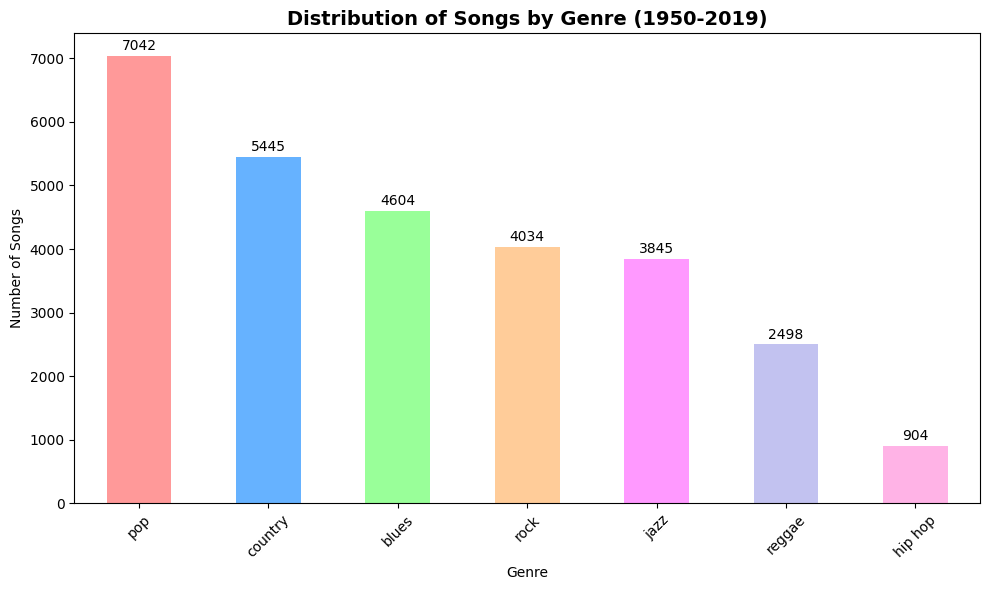

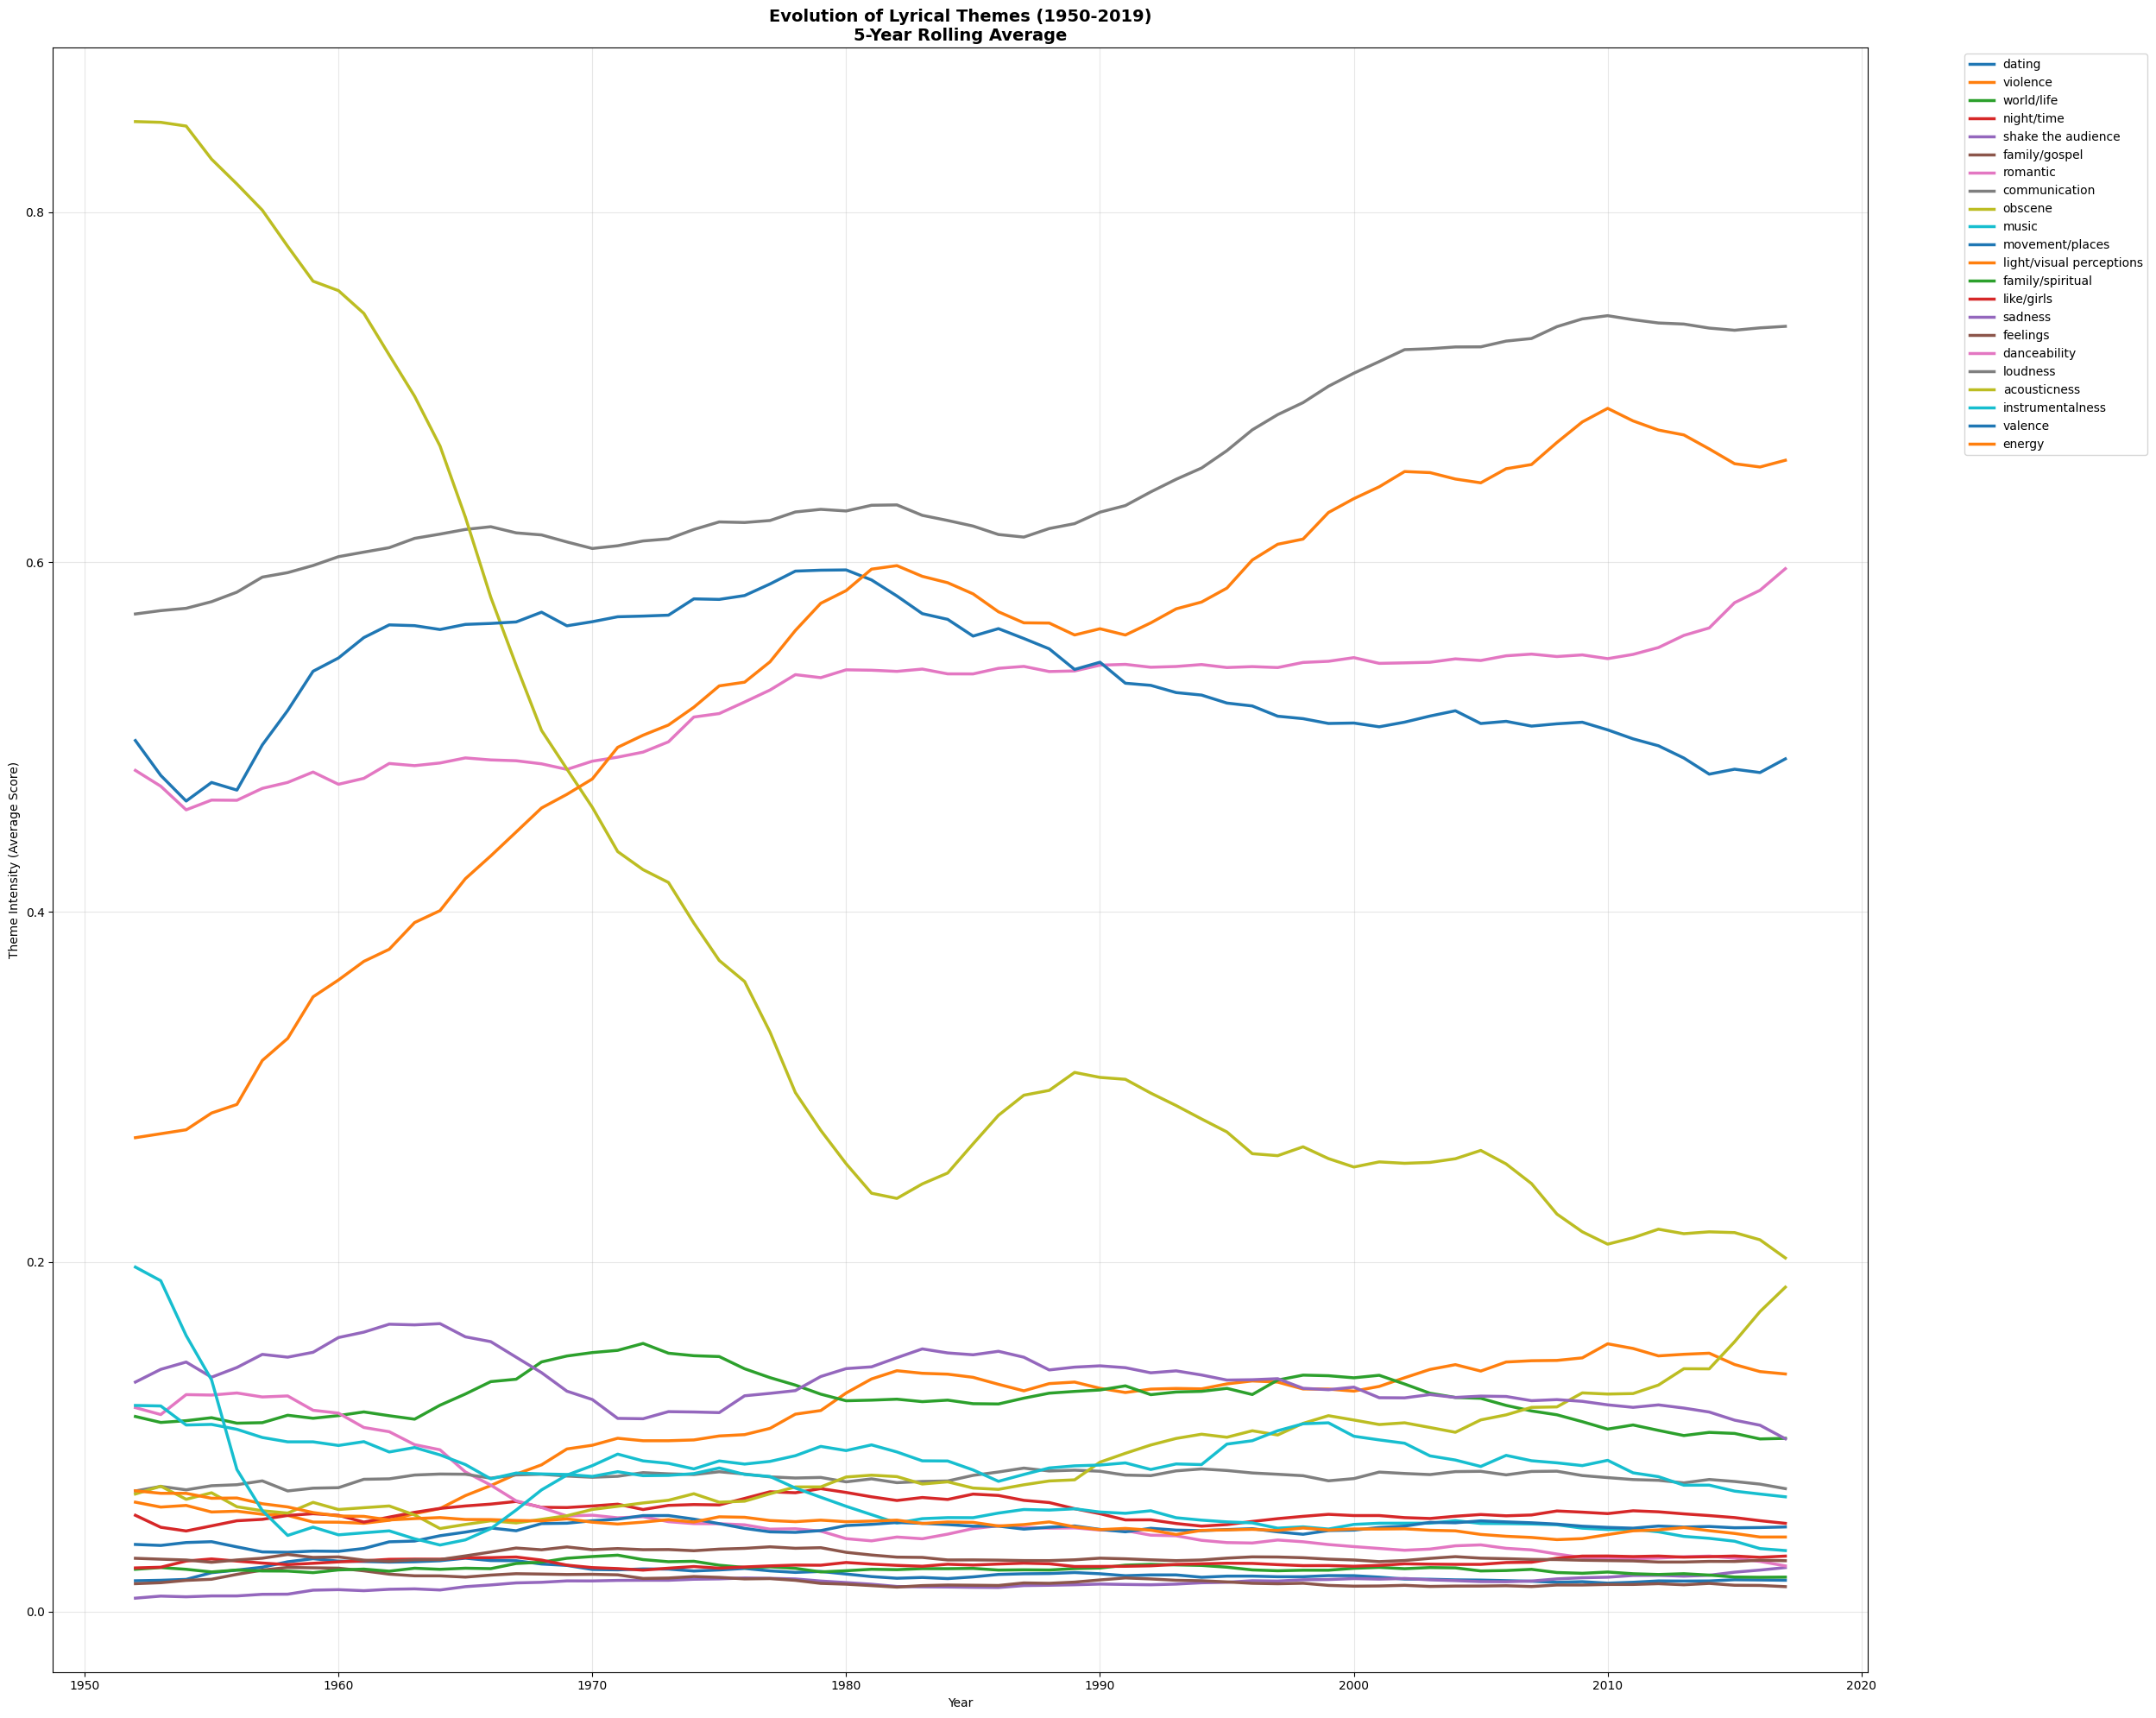

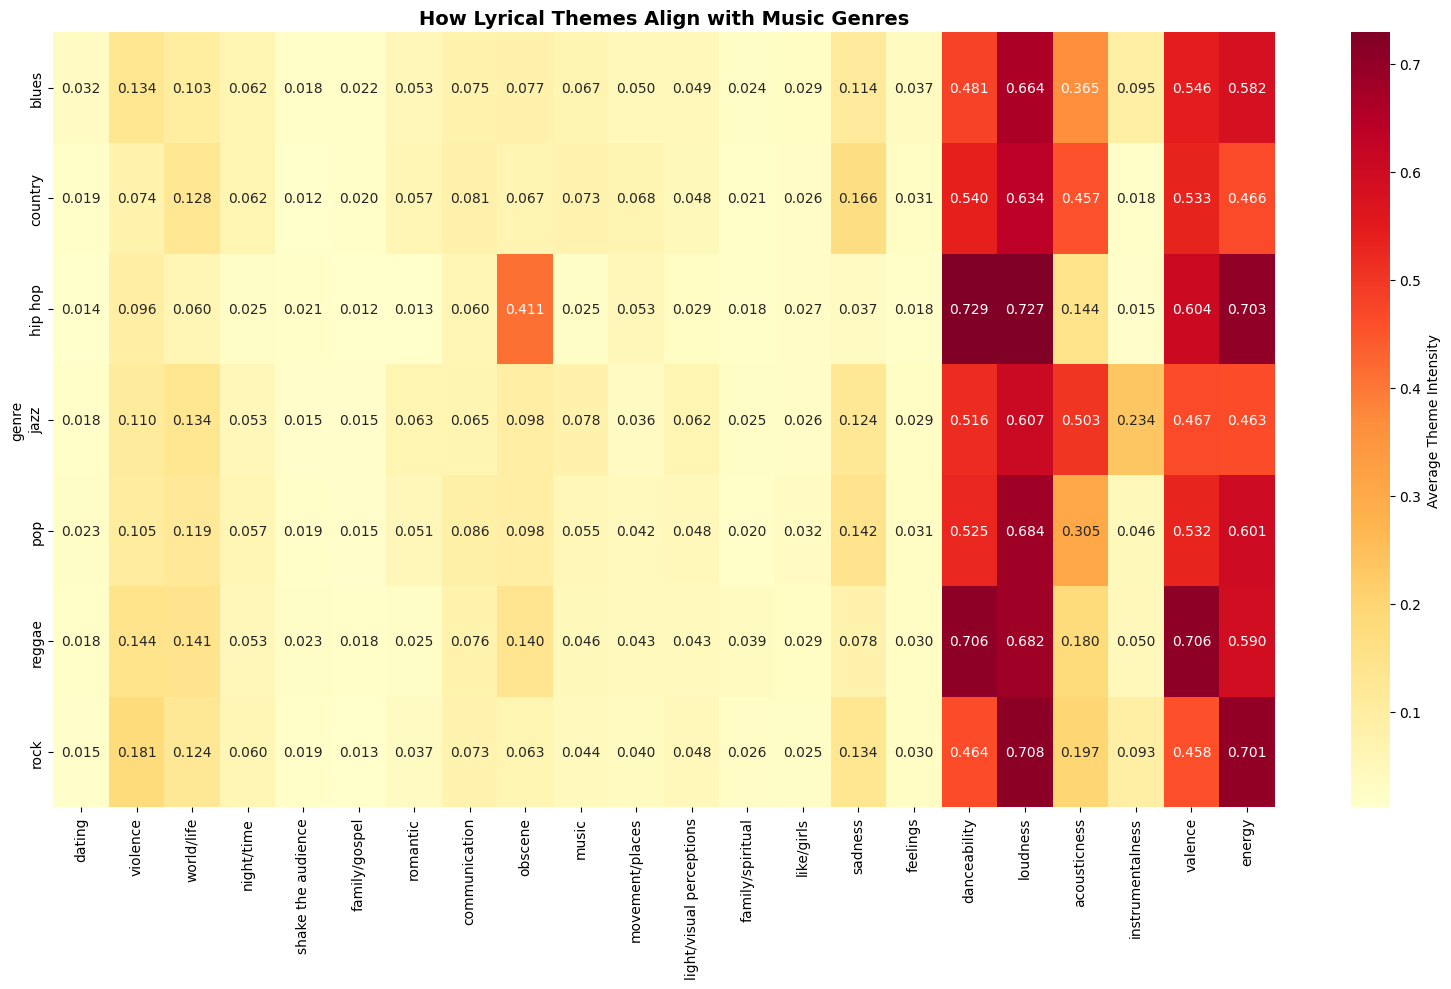

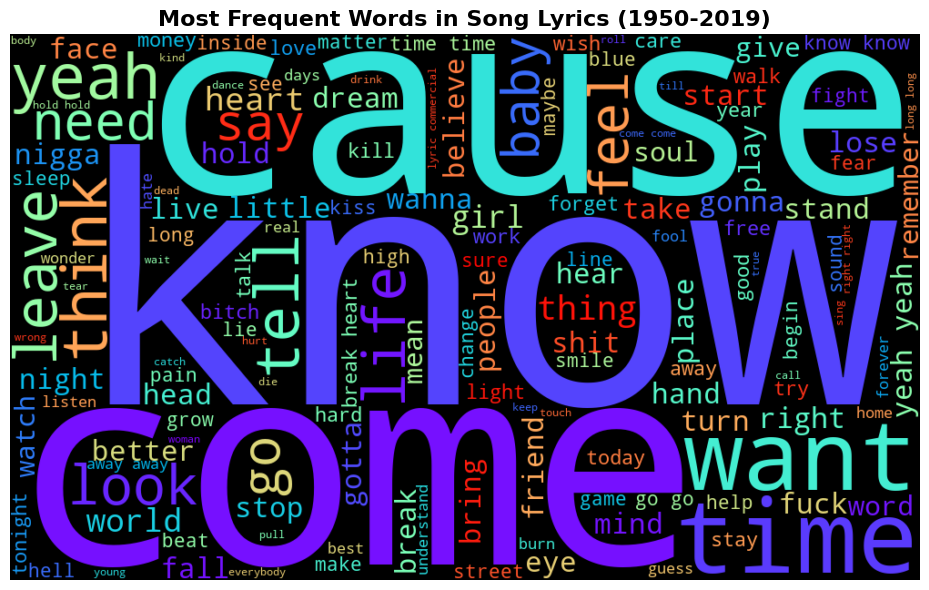

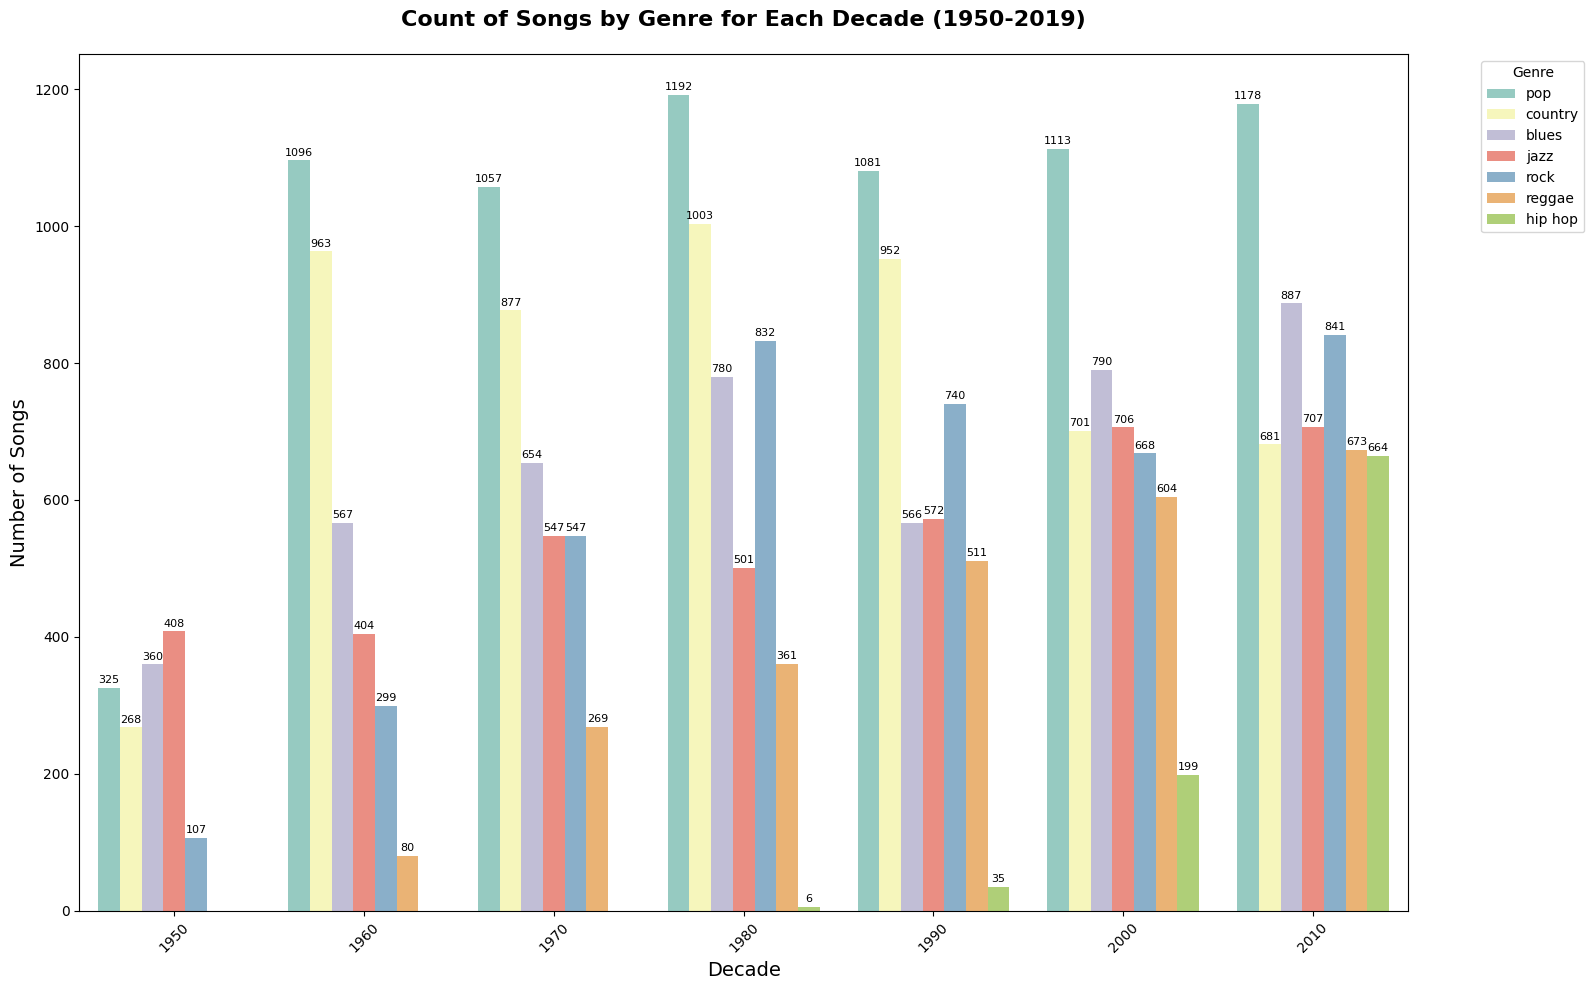

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# loading the data

df = pd.read_csv('tcc_ceds_music.csv')

# showcasing a barplot for distribution of musical genres

plt.figure(figsize=(10, 6))
genre_counts = df['genre'].value_counts()
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99FF', '#c2c2f0', '#ffb3e6']
ax = genre_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Songs by Genre (1950-2019)', fontweight='bold', fontsize=14)
plt.xlabel('Genre')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)

# adding number/value labels to the top of each bar with padding space and elimination of floating point decimals 

for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', padding=2)

plt.tight_layout()
plt.show()

# defining major themes I want to see in the plots and calculating an average on a "centered" rolling basis to smooth out trend line and clear out noise (truer rise/fall)

theme_columns = [
    'dating', 'violence', 'world/life', 'night/time', 'shake the audience',
    'family/gospel', 'romantic', 'communication', 'obscene', 'music',
    'movement/places', 'light/visual perceptions', 'family/spiritual',
    'like/girls', 'sadness', 'feelings', 'danceability', 'loudness',
    'acousticness', 'instrumentalness', 'valence', 'energy'
]
df_rolling = df.groupby('release_date')[theme_columns].mean().rolling(5, center=True).mean() # average from 5 surrounding years used for each year 

# creating a simple line trend plot by averaging out 

plt.figure(figsize=(25, 20))
for theme in theme_columns: # for theme in theme columns, plotting the years alongside (index) themes (labeled in legend)
    plt.plot(df_rolling.index, df_rolling[theme], label=theme, linewidth=2.5)

plt.title('Evolution of Lyrical Themes (1950-2019)\n5-Year Rolling Average', fontweight='bold', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Theme Intensity (Average Score)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # positioning for the legend
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# calculating average theme scores per genre

genre_theme_means = df.groupby('genre')[theme_columns].mean()

# creating a simple heatmap based on these theme scores and seeing how they align with each genre (looks better in R)

plt.figure(figsize=(16, 10))
sns.heatmap(genre_theme_means, 
            annot=True, # showing actual numerical value of each cell (relations)
            fmt='.3f', # formatting to round off to 3 decimal points 
            cmap='YlOrRd',  # color scheme for the heatmap (predefined)
            cbar_kws={'label': 'Average Theme Intensity'}) # title for color bar on the right
plt.title('How Lyrical Themes Align with Music Genres', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

# getting all the lyrics from the dataframe for a wordcloud (spaced apart)

all_lyrics = " ".join(lyric for lyric in df['lyrics'].astype(str))

# generating the word cloud to see the most common lyrics that show up in each of these songs 

wordcloud = WordCloud(width=1000, height=600, 
                      background_color='black', 
                      colormap='rainbow', 
                      max_words=150).generate(all_lyrics)

# plotting the word cloud

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear') # smooth render
plt.axis('off') # cleaning image as its not a typical plot 
plt.title('Most Frequent Words in Song Lyrics (1950-2019)', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

# creating decade column for separation 

df['decade'] = (df['release_date'] // 10) * 10

# setting stage for the plot

plt.figure(figsize=(16, 10))

# creating a count plot for across each decade based on the genres for the songs 

ax = sns.countplot(data=df, x='decade', hue='genre', palette='Set3')
plt.title('Count of Songs by Genre for Each Decade (1950-2019)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Number of Songs', fontsize=14)
plt.xticks(rotation=45) 

# labeling on top of each bar 

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=2, fontsize=8, label_type='edge')

# moving the legend in position 

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Genre')

plt.tight_layout()
plt.show()
